# **Homework 2**

Titipat Achakulvisut

## **Problem 1: Classifier – back propagation**

Use the code below to create three data clusters which are vertically stacked and therefore not linearly separable, as we discussed in class.  Your job is to create code implementing back propagation for a two layer neural network which can perform this classification.  Use a network with 4 hidden units, as indicated in the shell code. Don’t worry about cross validation and all that – feel free to just use all the data.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sd = .85
X1 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1))))
X2 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(5, sd, size=(50,1)), 
                np.random.normal(10, sd, size=(50,1))))
# X3 = np.ones((150, 1))
X = np.concatenate((X1, X2), axis=1)
y = np.zeros((150, 3))
y[0:50, 0] = 1
y[50:100, 1] = 1
y[100:150, 2] = 1

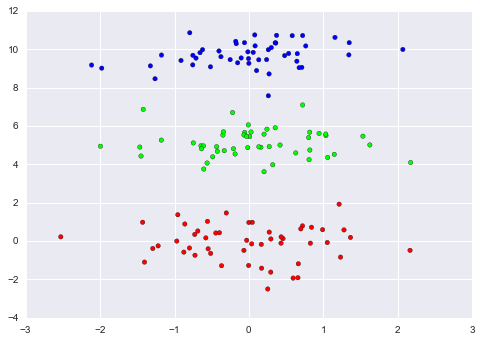

In [3]:
plt.scatter(X[:,0], X[:,1], c=y);

In [4]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    return sigmoid(z)*(1 - sigmoid(z))

In [5]:
ninput = 2
nhidden = 4
noutput = 3
W = np.random.uniform(-1, 1, size=(ninput+1, nhidden)) - 0.5
V = np.random.uniform(-1, 1, size=(nhidden+1, noutput)) - 0.5

In [6]:
def predict(W, V, X):
    """Do forward propagation given first and second layers"""
    n, m = X.shape
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    return h

In [7]:
def compute_grad_bp(W, V, X, Y):
    """
    Compute gradient of NN parameters for one iteration
    using back propagation
    """
    # initialize few parameters
    n, m = X.shape
    
    dW = np.zeros_like(W)
    dV = np.zeros_like(V)
    
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    
    # back propagation
    delta3 = h - Y
    delta2 = delta3.dot(V[1::,:].T)*sigmoid_grad(z2)
    
    dW = (1/m)*((delta2.T).dot(a1)).T
    dV = (1/m)*((delta3.T).dot(a2)).T
    
    return dW, dV

In [8]:
# gradient descent to find final neural nets parameter
n_iter = 4000
mu = 0.01
dW = np.zeros_like(W)
dV = np.zeros_like(V)
for i in range(n_iter):
    dW, dV = compute_grad_bp(W, V, X, y)
    W = W - mu*dW
    V = V - mu*dV

In [9]:
y_hat = predict(W, V, X)
print('Predicted output class: \n', y_hat.argmax(axis=1))
print( )

Predicted output class: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]



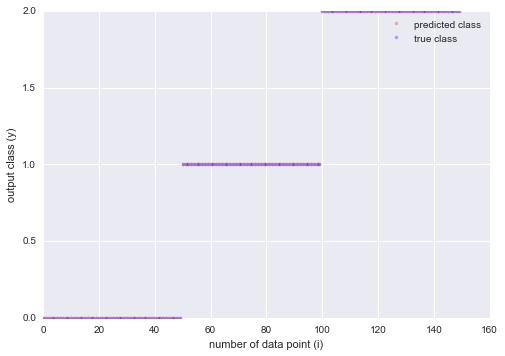

In [10]:
plt.plot(y_hat.argmax(axis=1), '.r', alpha=0.3)
plt.plot(y.argmax(axis=1), '.b', alpha=0.3) # output class for each datapoint
plt.xlabel('number of data point (i)')
plt.ylabel('output class (y)')
plt.legend(['predicted class', 'true class'])
plt.show()

## **Problem 2: Unsupervised learning – k-means clustering**

In each of the next problems you are given data that appears to be produced by two clusters (use the code in ps1 `datasets.m`, 2a).  Your job in this problem is to use k-means clustering to classify the data according to two clusters. Plot the trajectory of the means as they are updated over iterations, with this trajectory superimposed over the data sets.

In [11]:
X1 = np.hstack((np.random.normal(6, 1, size=(100,1)), 
                np.random.normal(2, 1, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 1, size=(100,1)), 
                np.random.normal(8, 1, size=(100, 1))))
X = np.vstack((X1, X2))

In [12]:
def update(X, centers, alpha=0.05):
    """Update K-mean center and compute cost in that iteration"""
    # number of cluster
    K = len(centers)
    # compute distance
    D = np.vstack([np.linalg.norm(X - center, axis=1) for center in centers]) 
    clusters = np.argmin(D.T, axis=1) # assign clusters
    centers = np.vstack([X[clusters==k].mean(axis=0) for k in range(K)])

    # compute cost of K-mean
    J = np.sum([np.sum(np.linalg.norm(X[clusters==k] - centers[k], axis=1)) 
                for k in range(K)])
    return centers, J, clusters

In [13]:
def random_centers(X, K=2):
    """
    Randomly generate K centers from data X
    """
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    centers = []
    for k in range(K):
        center = [np.random.uniform(X_min[i], X_max[i]) for i in range(len(X_min))]
        centers.append(center)
    return np.array(centers)

In [14]:
n_iter = 100
n_cluster = 2
centers = random_centers(X, K=n_cluster) # random center
print('Initial centers are \n', centers)
clusters = np.zeros(X.shape[0])
u = True
J_list = []
centers_list = []
while u:
    clusters_prev = clusters
    centers_list.append(centers)
    centers, J, clusters = update(X, centers) # compute new center and cost
    J_list.append(J)
    if np.all(clusters_prev == clusters):
        u = False

Initial centers are 
 [[ 7.74208779  9.9815069 ]
 [ 3.76859651  0.52024945]]


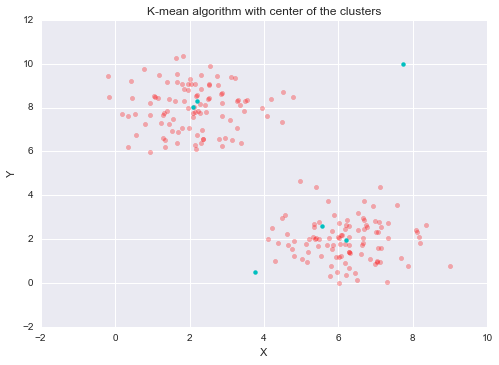

Center for final cluster are 
 [2.098415883325448, 8.0076241787313087]  and 
 [6.2067800731765992, 1.9574372122027575]


In [15]:
plt.scatter(X[:, 0], X[:, 1], color='r', alpha=0.3)
for c in centers_list:
    for k in range(n_cluster):
        plt.scatter(c[k][0], c[k][1], color='c', lw = 0)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-mean algorithm with center of the clusters')
plt.show()
print('Center for final cluster are \n', 
      list(centers_list[-1][0]), ' and \n', 
      list(centers_list[-1][1]))

## **Problem 3: Unsupervised learning – ML gradient descent**

Your job is to classify the same dataset as used in problem 2 into two clusters using ML gradient descent to update the values of mean and standard deviation of two Gaussian clusters.  Assume that the prior probabilities of each cluster are already given and fixed at 0.5 each.  

**Ans.** Basically, we have mixure of Gaussians on variable $\mathbf{x}$ as follows: 
$$p(\mathbf{x}) = \sum_{k=1}^{K} \rho_k \cfrac{1}{\sqrt{det(2\pi\Sigma_k)}} \exp[-\cfrac{1}{2}(\mathbf{x} - \mathbf{\mu}_k)^T \sigma_k^{-1} (\mathbf{x} - \mathbf{\mu}_k)]$$

where $\rho_k$ sum up to 1. Now the log-likelihood will be, as following

$$\ln p(\mathbf{x}) = \sum_{k=1}^{K} \log(\rho_k) - \log(C) - \log(det(2\pi\Sigma_k)) - \cfrac{1}{2} ((\mathbf{x} - \mathbf{\mu}_k)^T \Sigma^{-1} (\mathbf{x} - \mathbf{\mu}_k)) $$

where $C$ in this case is a constant term (in front of Gausian distribution)

Thus the gradient of log-likelihood with respect to mean and variance (giving we assuming that we know $\rho_k$) is as follows

$$\cfrac{\partial \ln p(\mathbf{x})}{\partial \mathbf{\mu}_k} = \Sigma_j^{-1} (\mathbf{x} - \mathbf{\mu}_k)$$

and 

$$\cfrac{\partial \ln p(\mathbf{x})}{\partial \Sigma_k} = \cfrac{1}{2}[ - \Sigma_k^{-1} + \Sigma_k^{-1} (\mathbf{x} - \mathbf{\mu}_k)(\mathbf{x} - \mathbf{\mu}_k)^T \Sigma_k^{-1}]$$

**note (some matrix tricks):**

- use this trick in finding gradient with respect to mean  $\cfrac{\partial}{\partial \mathbf{x}} (\mathbf{x} - \mathbf{s})^T \mathbf{W} (\mathbf{x} - \mathbf{s}) = 2 \mathbf{W} (\mathbf{x} - \mathbf{s})$
- use this trick in finding gradient with respect to covariance matrix (in this case, we know that covariace matrix is symmetric so we can get rid of transpose) $\cfrac{\partial ln | \det (\mathbf{X}) |}{\partial(\mathbf{X})} = (X^{-1})^T$

In this homework, we consider special case where Spherical covariance is as follows $\Sigma = \sigma_i^2 I$

The likelihood and log-likelihood can be written as follows:

$$p(\mathbf{x}) = \sum_{k=1}^{K} \rho_k \cfrac{1}{\sqrt{2\pi\sigma_k}^{2d}}\exp[-\cfrac{1}{2} \cfrac{(\mathbf{x} - \mathbf{\mu}_k)^T (\mathbf{x} - \mathbf{\mu}_k)}{\sigma_k^2}]$$

$$\ln{p(\mathbf{x})} = \sum_{k=1}^{K} \log(\rho_k) - \log(C) - d \log{\sigma}_k - \cfrac{1}{2} \cfrac{(\mathbf{x} - \mathbf{\mu}_k)^T(\mathbf{x} - \mathbf{\mu}_k)}{\sigma_k^2}$$

where $d$ is dimension of the Gaussian (in our case, $d = 2$)

Therefore, the partial derivative with respect to mean and standard deviation is as follows:

$$\cfrac{\partial \ln p(\mathbf{x})}{\partial \mathbf{\mu}_k} = \cfrac{(\mathbf{x} - \mathbf{\mu}_k)}{\sigma_k^2}$$

$$\cfrac{\partial \ln p(\mathbf{x})}{\partial \mathbf{\sigma}_k} = -\cfrac{d}{\sigma_k} + \cfrac{(\mathbf{x} - \mathbf{\mu})^T (\mathbf{x} - \mathbf{\mu})}{\sigma_k^3}$$

In [16]:
import numpy.linalg as la
def inv(A):
    """return inverse of input matrix A"""
    return la.inv(A)

here is when we want to estimate mean and standard deviation for each clusters assuming spherical Gaussian distribution $\Sigma_k = \sigma_k^2 I$

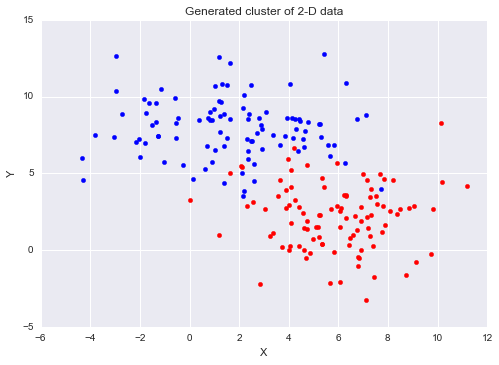

Mean for each clusters is 
 [ 5.85181235  2.18354997] [ 1.70854516  7.92789488]


In [17]:
# generate data for problem
X1 = np.hstack((np.random.normal(6, 2, size=(100,1)), 
                np.random.normal(2, 2, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 3, size=(100,1)), 
                np.random.normal(8, 2, size=(100, 1))))
X = np.vstack((X1, X2))
y = np.vstack([np.ones((100, 1)), np.zeros((100, 1))]).flatten()
plt.scatter(X[(y==1).flatten(), 0], X[(y==1).flatten(), 1], color='r')
plt.scatter(X[(y==0).flatten(), 0], X[(y==0).flatten(), 1], color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Generated cluster of 2-D data')
plt.show()
print('Mean for each clusters is \n', 
      np.mean(X1, axis=0), 
      np.mean(X2, axis=0))

In [18]:
def rbf_kernel(x, y, s):
    """
    Compute radial basis kernel of two vector
    k(x, y) = exp(-||x-y||^2/s^2)
    """
    d = len(x)
    x = np.array(x)
    y = np.array(y)
    return (1./(np.sqrt(2*np.pi*(s**(2*d)))))*np.exp(-np.linalg.norm(x - y)**2/(s**2))

In [19]:
def prob_cluster(x, centers, sigma):
    """
    compute probability belonging to each clusters
    and class that data belong to
    """
    p = [rbf_kernel(x, center, s) for (center, s) in zip(centers, sigma)]
    p = np.array(p)
    p = p/np.sum(p)
    return p

In [20]:
def data_cluster(x, centers, sigma):
    """
    compute probability belonging to each clusters
    and class that data belong to
    """
    p = [rbf_kernel(x, center, s) for (center, s) in zip(centers, sigma)]
    p = np.array(p)
    p = p/np.sum(p)
    return np.argmax(p)

In [24]:
lr_center = 1e-2
lr_sigma = 1e-4
n_iter = 100
centers = random_centers(X, K=2)
sigma = np.random.uniform(low=0.5, high=1.5, size=2)
print('Initialized center = \n', centers)
print('Initializerd standard deviation = \n', sigma)

Initialized center = 
 [[ 8.71168965  5.54659487]
 [ 3.17398159 -0.10407014]]
Initializerd standard deviation = 
 [ 1.13329354  0.58835765]


In [26]:
for n in range(n_iter):
    # probability of each data points belong to each centers
    P = np.vstack([prob_cluster(x, centers, sigma) for x in X])
    grad_centers = np.zeros_like(centers)
    grad_sigma = np.zeros_like(sigma)
    for (p, x) in zip(P, X):
        # loop through both cluster
        for i in range(len(p)):
            grad_centers[i] += p[i]*(x - centers[i])/sigma[i]**2
            grad_sigma[i] += p[i]*((-2./sigma[i]) + 
                                   (x - centers[i]).dot(x - centers[i])/(sigma[i]**3))
    centers = centers + lr_center*grad_centers
    sigma = sigma + lr_sigma*grad_sigma
print('Final center = \n', centers)
print('Final standard deviation = \n', sigma)

Final center = 
 [[ 1.86801851  7.62045358]
 [ 6.21080082  1.79535352]]
Final standard deviation = 
 [ 2.35957228  1.77533294]


In [27]:
out = np.array([data_cluster(x, centers, sigma) for x in X]) # output cluster
print('Output class for each data point: \n', out)

Output class for each data point: 
 [1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1
 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


This is quite interesting in the case of $\Sigma_k = \sigma_k^2 I$ that we get standard deviation around 2 for the Guassian  generated data that has standard deviation of 2 for both axis. And standard deviation around 2.5 for generated data that has SD of 3, 2 for $x$, $y$ axis respectively. 

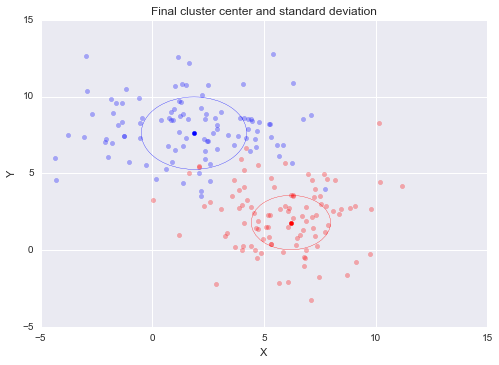

In [29]:
fig = plt.figure(1)
plt.axis([-5,15,-5,15])
ax = fig.add_subplot(1,1,1)
colors = ['b', 'r']
circles = [plt.Circle((c[0], c[1]), s, color=co, fill=False) 
           for (c, s, co) in zip(centers, sigma, colors)]
for circle in circles:
    ax.add_patch(circle)
for (center, co) in zip(centers, colors):
    plt.scatter(center[0], center[1], color=co)
plt.scatter(X[(y==1).flatten(), 0], X[(y==1).flatten(), 1], color='r', alpha=0.3)
plt.scatter(X[(y==0).flatten(), 0], X[(y==0).flatten(), 1], color='b', alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Final cluster center and standard deviation')
plt.show()